In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
import CollisionModule

In [2]:
import torch

In [3]:
release_pos = np.load('./release_pos_1e8.npy')
velosity_matrix = np.load('./velosity_matrix_1e8.npy')
DXsec_Al = np.load('./DXsec_Al_1e8.npy')

(6565275, 3)


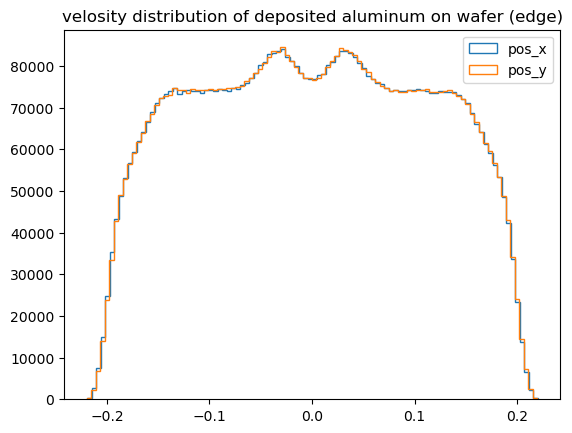

In [4]:
print(release_pos.shape)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(release_pos[:,0], bins=100,histtype='step', stacked=True, fill=False, label='pos_x')
ax.hist(release_pos[:,1], bins=100,histtype='step', stacked=True, fill=False, label='pos_y')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

(6565275, 3)


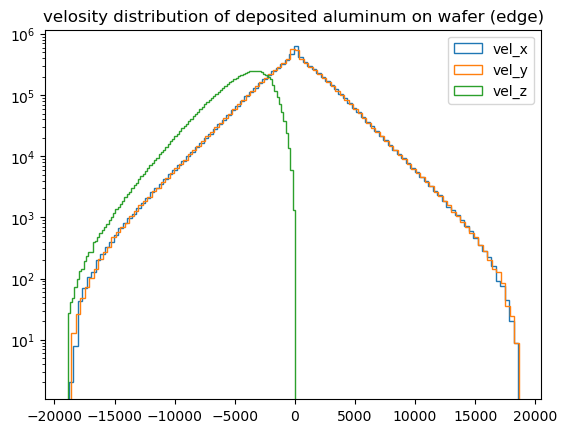

In [5]:
print(velosity_matrix.shape)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(velosity_matrix[:,0], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(velosity_matrix[:,1], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(velosity_matrix[:,2], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [4]:
TS = 0.3 #300mm
release_pos[:,2] += TS
print(release_pos[:,0].min())
print(release_pos[:,0].max())
print(release_pos[:,1].min())
print(release_pos[:,1].max())

-0.2192283690130521
0.219774927605747
-0.21972756268358049
0.2194524202704513


In [7]:
transport = CollisionModule.transport(pressure_pa=0.1, timeStep= 1e-7, temperature=300, cellSize=[240, 240, 150], celllength=0.48/240, chamberSize=[0.24, 0.24], DXsec=DXsec_Al)
transport.setXsec(energy_range=[0, 50, 50])

l:\ysy\etching\CollisionModule.py:70: RuntimeWarning: divide by zero encountered in divide
  diVr = d_refi * np.sqrt(((kb*Tref)/(eVr*self.q))**(wi-1/2)*gamma(5/2 - wi))


array([0.00000000e+00, 2.48469445e-19, 2.13253357e-19, 1.95014882e-19,
       1.83028518e-19, 1.74240899e-19, 1.67375019e-19, 1.61781505e-19,
       1.57087507e-19, 1.53060285e-19, 1.49545376e-19, 1.46435341e-19,
       1.43652611e-19, 1.41139470e-19, 1.38851878e-19, 1.36755521e-19,
       1.34823170e-19, 1.33032883e-19, 1.31366734e-19, 1.29809902e-19,
       1.28350001e-19, 1.26976583e-19, 1.25680757e-19, 1.24454901e-19,
       1.23292430e-19, 1.22187624e-19, 1.21135481e-19, 1.20131605e-19,
       1.19172114e-19, 1.18253562e-19, 1.17372878e-19, 1.16527314e-19,
       1.15714403e-19, 1.14931921e-19, 1.14177857e-19, 1.13450388e-19,
       1.12747855e-19, 1.12068745e-19, 1.11411676e-19, 1.10775379e-19,
       1.10158690e-19, 1.09560536e-19, 1.08979929e-19, 1.08415954e-19,
       1.07867764e-19, 1.07334573e-19, 1.06815650e-19, 1.06310317e-19,
       1.05817939e-19, 1.05337924e-19])

In [8]:
result = transport.runE(p0=release_pos, v0=velosity_matrix, time=1e-3)

running: 100%|██████████████████████████████████████████████████████| 100/100 [28:59<00:00, 17.4s/B]


In [9]:
np.save('transport_TS300_result_posvel', result[2])

In [10]:
np.save('transport_TS300_result_collisionPos', result[1])

In [3]:
result2 = np.load('./transport_TS300_result_posvel.npy')
result1 = np.load('./transport_TS300_result_collisionPos.npy')

In [5]:
x_erosion_np = result[1][:,0]
y_erosion_np = result[1][:,1]

xbins = np.linspace(-0.24,0.24,400)
ybins = np.linspace(-0.24,0.24,400)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
y_bins = np.histogram(y_erosion_np, bins=ybins)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

NameError: name 'result' is not defined

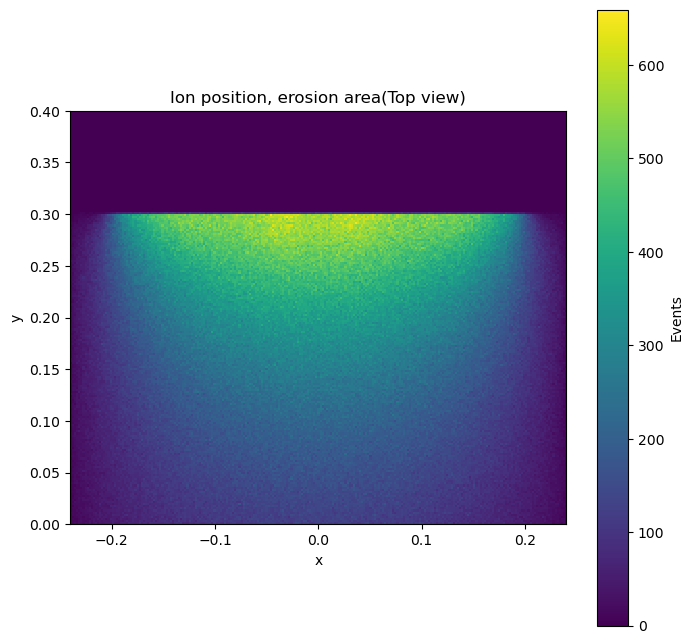

In [14]:
x_erosion_np = result[1][:,0]
z_erosion_np = result[1][:,2]

xbins = np.linspace(-0.24,0.24,240)
zbins = np.linspace(0,0.4,200)
# zbins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
z_bins = np.histogram(z_erosion_np, bins=zbins)

H, xedges, zedges = np.histogram2d(x_erosion_np, z_erosion_np, bins=(xbins, zbins))

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], zedges[0], zedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [4]:
depo_pv = result2
a = np.array(depo_pv)
print(a.shape)

(2722016, 6)


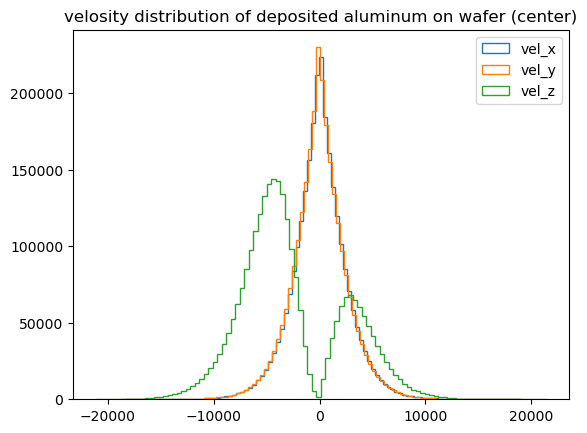

In [5]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(a[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(a[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(a[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

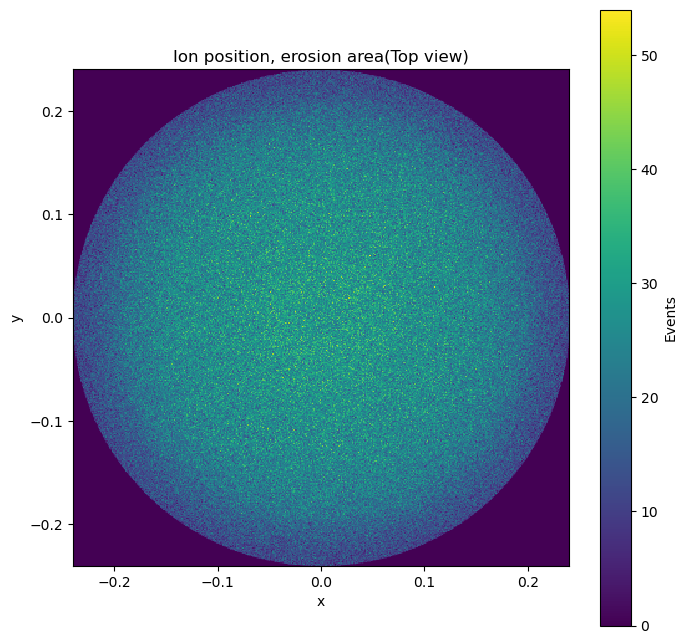

In [6]:
x_erosion_np = a[:,0]
y_erosion_np = a[:,1]

xbins = np.linspace(-0.24,0.24,400)
ybins = np.linspace(-0.24,0.24,400)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
y_bins = np.histogram(y_erosion_np, bins=ybins)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [7]:
center_indices = np.logical_or(a[:,0] < -0.04, a[:,0] > 0.04)
center_indices |= np.logical_or(a[:,1] < -0.04, a[:,1] > 0.04)
center_indices |= np.array(a[:,2] > 0.2)

if np.any(center_indices):
    center_depo = a[~center_indices]

print(center_depo.shape)

(92494, 6)


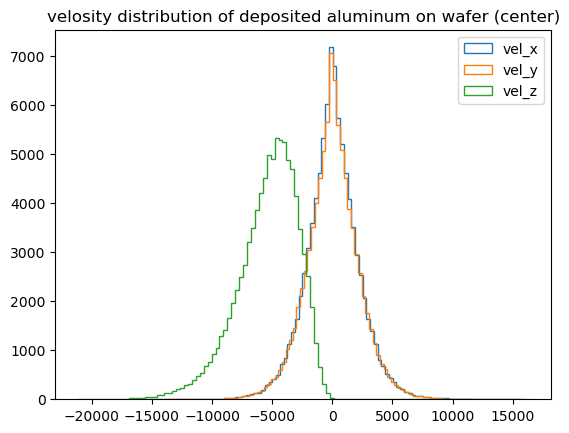

In [8]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(center_depo[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(center_depo[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(center_depo[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

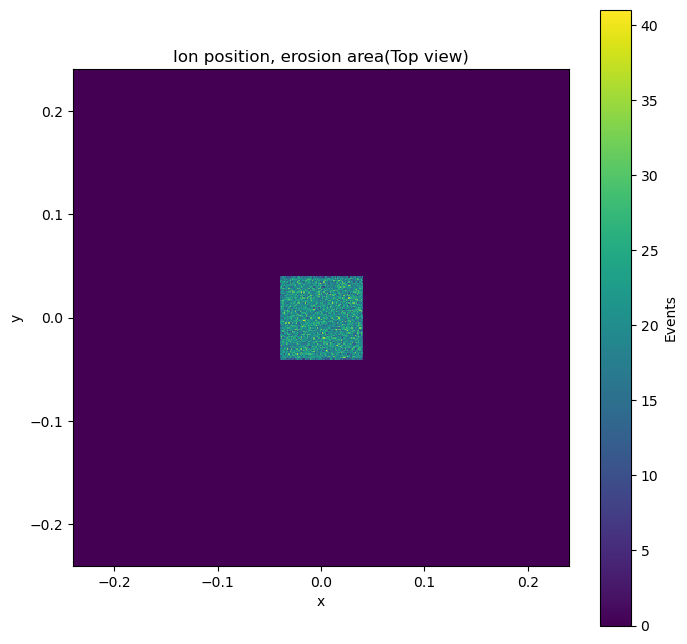

In [9]:
x_erosion_np = center_depo[:,0]
y_erosion_np = center_depo[:,1]

xbins = np.linspace(-0.24,0.24,400)
ybins = np.linspace(-0.24,0.24,400)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
y_bins = np.histogram(y_erosion_np, bins=ybins)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [10]:
edge_indices = np.logical_or(a[:,0] < 0.14, a[:,0] > 0.22)
edge_indices |= np.logical_or(a[:,1] < -0.04, a[:,1] > 0.04)
edge_indices |= np.array(a[:,2] > 0.2)
if np.any(edge_indices):
    edge_depo = a[~edge_indices]

print(edge_depo.shape)

(64399, 6)


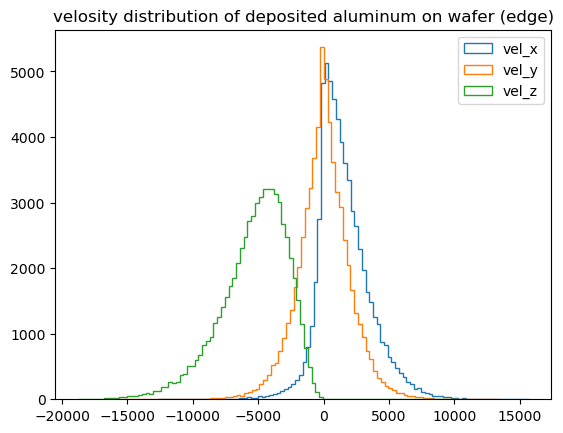

In [11]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(edge_depo[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(edge_depo[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(edge_depo[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

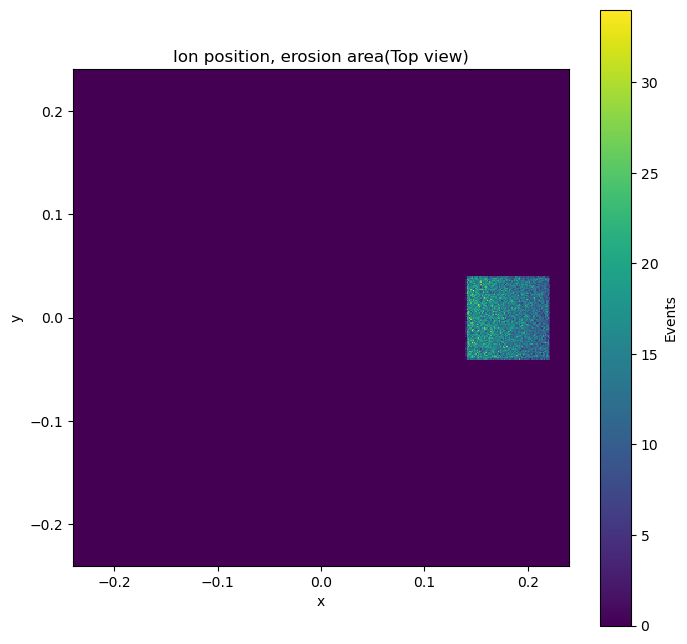

In [12]:
x_erosion_np = edge_depo[:,0]
y_erosion_np = edge_depo[:,1]

xbins = np.linspace(-0.24,0.24,400)
ybins = np.linspace(-0.24,0.24,400)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
y_bins = np.histogram(y_erosion_np, bins=ybins)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [13]:
for i in range(1):
    center_depo = np.concatenate((center_depo, center_depo), axis=0)

print(center_depo.shape)

(184988, 6)


In [14]:
import depoSimulator_symmetry

In [15]:
film = np.zeros((88, 88, 120))

bottom = 10
film[:, :, 0:bottom] = 10 # bottom

height = 30
left_side = 24
right_side = 24
film[:, 88-right_side:, 0:height] = 10
film[:, 0:left_side, 0:height] = 10
film[88-right_side:, :, 0:height] = 10
film[0:left_side, :, 0:height] = 10

In [68]:
substrute = torch.Tensor(film==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter()
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=9)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:58128/index.html?ui=P_0x208e70d92d0_9&reconnect=auto" class="pyvis…

In [16]:
print(center_depo[:, 3:].shape)

(184988, 3)


In [17]:
logname = 'TS300'
test = depoSimulator_symmetry.depo(param = [1.6, -0.7], TS = 0.3, N = center_depo.shape[0], sub_xy=[0,0], film=film, n=1, cellSize=[88, 88, 120], celllength=1, kdtreeN=5, tstep=1e-4, logname=logname)
deposit = test.run_afterCollision(1, 125, center_depo[:, 3:], 0.5)

running: 100%|██████████████████████████████████████████████████████| 100/100 [05:15<00:00, 3.15s/B]


In [21]:
np.save('./TScompare/TS300_afterCollision_0530_v2_run1_t1e-5_p4e6', deposit)

In [20]:
depo1 = torch.Tensor(deposit[20:46, :, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

# depo2 = torch.Tensor(deposit[:100, :, :]==40).to_sparse()
# depo2 = depo2.indices().numpy().T

# depo3 = torch.Tensor(np.logical_or( deposit[:100, :, :]==60, deposit[:100, :, :]==80)).to_sparse()
# depo3 = depo3.indices().numpy().T

substrute = torch.Tensor(deposit[20:46, :, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter() 
p.add_mesh(depo1, color='red', point_size=10)
# p.add_mesh(depo2, color='green', point_size=5)
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=10)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:50258/index.html?ui=P_0x2181b977910_2&reconnect=auto" class="pyvis…

In [19]:
depo1 = torch.Tensor(deposit[:, :, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

# depo2 = torch.Tensor(deposit[:100, :, :]==40).to_sparse()
# depo2 = depo2.indices().numpy().T

# depo3 = torch.Tensor(np.logical_or( deposit[:100, :, :]==60, deposit[:100, :, :]==80)).to_sparse()
# depo3 = depo3.indices().numpy().T

substrute = torch.Tensor(deposit[:, :, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter() 
p.add_mesh(depo1, color='red', point_size=10)
# p.add_mesh(depo2, color='green', point_size=5)
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=10)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:50258/index.html?ui=P_0x2187ad399d0_1&reconnect=auto" class="pyvis…

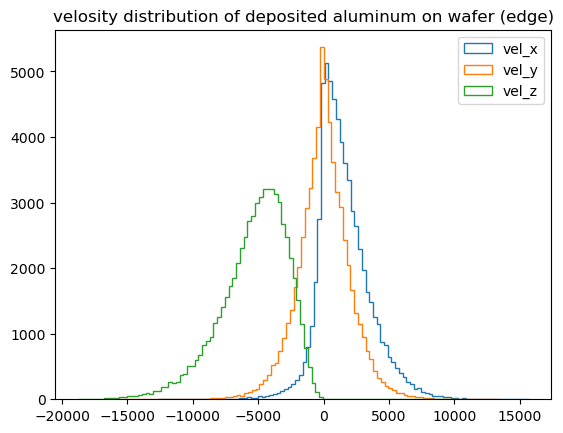

In [22]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(edge_depo[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(edge_depo[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(edge_depo[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [23]:
for i in range(3):
    edge_depo = np.concatenate((edge_depo, edge_depo), axis=0)

print(edge_depo.shape)

(515192, 6)


In [24]:
logname = 'TS300'
test = depoSimulator_symmetry.depo(param = [1.6, -0.7], TS = 0.3, N = edge_depo.shape[0], sub_xy=[0,0], film=film, n=1, cellSize=[88, 88, 120], celllength=1, kdtreeN=5, tstep=1e-4, logname=logname)
deposit = test.run_afterCollision(1, 125, edge_depo[:, 3:], 0.5)

running:  62%|████████████████████████████████▊                    | 62.0/100 [03:48<02:19, 3.68s/B]


In [28]:
np.save('./TScompare/TS300_afterCollision_0530_v2_run1_t1e-5_p4e6_edge', deposit)

In [25]:
depo1 = torch.Tensor(deposit[20:46, 20:68, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

# depo2 = torch.Tensor(deposit[:100, :, :]==40).to_sparse()
# depo2 = depo2.indices().numpy().T

# depo3 = torch.Tensor(np.logical_or( deposit[:100, :, :]==60, deposit[:100, :, :]==80)).to_sparse()
# depo3 = depo3.indices().numpy().T

substrute = torch.Tensor(deposit[20:46, 20:68, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter() 
p.add_mesh(depo1, color='red', point_size=10)
# p.add_mesh(depo2, color='green', point_size=5)
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=10)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:50258/index.html?ui=P_0x2181c2bdc90_3&reconnect=auto" class="pyvis…

In [34]:
depo1 = torch.Tensor(deposit[20:68, 20:46, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

# depo2 = torch.Tensor(deposit[:100, :, :]==40).to_sparse()
# depo2 = depo2.indices().numpy().T

# depo3 = torch.Tensor(np.logical_or( deposit[:100, :, :]==60, deposit[:100, :, :]==80)).to_sparse()
# depo3 = depo3.indices().numpy().T

substrute = torch.Tensor(deposit[20:68, 20:48, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter() 
p.add_mesh(depo1, color='red', point_size=10)
# p.add_mesh(depo2, color='green', point_size=5)
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=10)
p.enable_eye_dome_lighting()
p.camera_position = 'xz'
p.camera.azimuth = 180
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:50258/index.html?ui=P_0x21838845ad0_11&reconnect=auto" class="pyvi…

In [27]:
depo1 = torch.Tensor(deposit[:, :, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

# depo2 = torch.Tensor(deposit[:100, :, :]==40).to_sparse()
# depo2 = depo2.indices().numpy().T

# depo3 = torch.Tensor(np.logical_or( deposit[:100, :, :]==60, deposit[:100, :, :]==80)).to_sparse()
# depo3 = depo3.indices().numpy().T

substrute = torch.Tensor(deposit[:, :, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter() 
p.add_mesh(depo1, color='red', point_size=10)
# p.add_mesh(depo2, color='green', point_size=5)
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=10)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:50258/index.html?ui=P_0x218375ba4d0_5&reconnect=auto" class="pyvis…